In [3]:
#this program will only work zumi python library 1.2
#TODO: Need to fix the index since i added mpu temp to 17; shift everything
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display
import pickle

zumi = Zumi()
zumi.reset_gyro()

zumi.MIN_I2C_DELAY = 0.0
zumi.MAX_USER_SPEED = 127

#best circle fit for compass data
xc =  -220.83849306848228
yc =  1585.0751626523236 
r =  895.0783226261946

# x center  -640.3895135559609 
# Y center  1597.617698370909 
# Radius  720.7244584305457

# x center  -220.83849306848228 
# Y center  1585.0751626523236 
# Radius  895.0783226261946
#r = 1

#adjust compass
calibration_matrix = [ [1.0, 0.0, -xc],
                       [0.0, 1.0, -yc], 
                       [0.0, 0.0, 1.0]]

print(zumi.compass.set_calibration(calibration_matrix))

def column(column_number, matrix):
    return [row[column_number] for row in matrix]

temp_data = zumi.get_all_sensor_data()

print("number of items in list ",len(temp_data))
print("time samples taken ",temp_data[0])
print("ir values ",temp_data[1:7])
print("batt volt detected",temp_data[7])
print("vcc volt ",temp_data[8])
print("version on board ",temp_data[9])
print("user def variable ",temp_data[10])

print("x acc ",temp_data[11])
print("y acc ",temp_data[12])
print("z acc ",temp_data[13])

print("x ang speed ",temp_data[14])
print("y ang speed ",temp_data[15])
print("z ang speed ",temp_data[16])

print("mpu temp ",temp_data[17])

print("x ang ",temp_data[18])
print("y ang ",temp_data[19])
print("z ang ",temp_data[20])


print("x ang from acc ",temp_data[21])
print("y ang from acc ",temp_data[22])

print("x complementary ang ",temp_data[23])
print("y complementary ang ",temp_data[24])


print("rot x ang ",temp_data[25])
print("rot y ang ",temp_data[26])
print("rot z ang ",temp_data[27])

print("tilt orientation ",temp_data[28])

print("x mag ",temp_data[29])
print("y mag ",temp_data[30])
print("z mag ",temp_data[31])
print("mag temp ",temp_data[32])

print("mag bearing ",temp_data[33])

 Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
None
number of items in list  34
time samples taken  1582524537.73901
ir values  [245, 145, 225, 147, 235, 247]
batt volt detected 4.051724137931035
vcc volt  5.0625
version on board  1.2
user def variable  0
x acc  0.0947265625
y acc  -0.007080078125
z acc  0.985595703125
x ang speed  -0.09503780111764426
y ang speed  -0.1598077947390143
z ang speed  -0.26471604218213207
mpu temp  30.506470588235295
x ang  -0.0011482335499850805
y ang  -0.0019307756420134424
z ang  -0.0031982625574063163
x ang from acc  -0.4115801401373531
y ang from acc  -5.489890627742041
x complementary ang  -0.00935687168173244
y complementary ang  -0.11168997268401401
rot x ang  1.048747522727653
rot y ang  -0.005858893692314252
rot z ang  89.47024813956257
tilt orientation  5
x mag  -1481
y mag  926
z mag  4001
mag temp 

In [9]:
zumi.reset_gyro()
#zumi.mpu.calibrate_MPU(100)

time_out = 100
speed = 10
time_passed = 0

sensor_list = []

print("starting")

for i in range(25):
    sensor_list.append(zumi.get_all_sensor_data())
zumi.control_motors(-speed,speed)

init_time = time.time()

while(time_passed <= time_out):
    current_time = time.time()
    time_passed = current_time-init_time
    sensor_list.append(zumi.get_all_sensor_data())
    
zumi.stop()

for i in range(25):
    sensor_list.append(zumi.get_all_sensor_data())
    
print("done")
file = open("test.data", "wb")
pickle.dump(sensor_list,file)
file.close()    

'''
print("number of items in list ",len(temp_data))
print("time samples taken ",temp_data[0])
print("ir values ",temp_data[1:7])
print("batt volt detected",temp_data[7])
print("vcc volt ",temp_data[8])
print("version on board ",temp_data[9])
print("user def variable ",temp_data[10])
'''

starting
done


'\nprint("number of items in list ",len(temp_data))\nprint("time samples taken ",temp_data[0])\nprint("ir values ",temp_data[1:7])\nprint("batt volt detected",temp_data[7])\nprint("vcc volt ",temp_data[8])\nprint("version on board ",temp_data[9])\nprint("user def variable ",temp_data[10])\n'

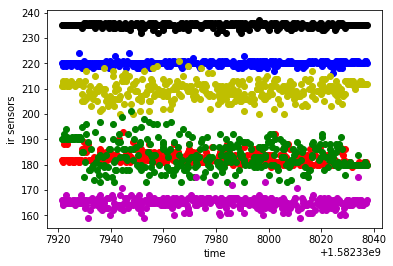

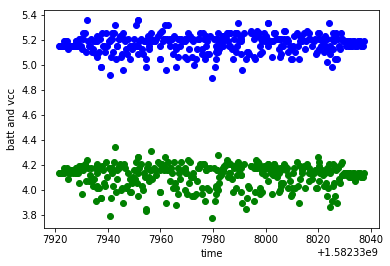

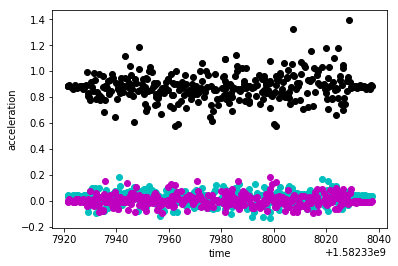

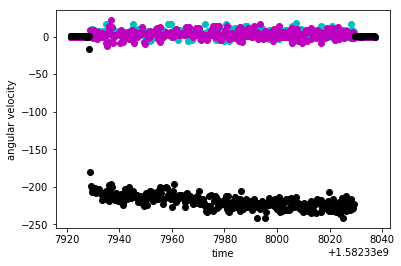

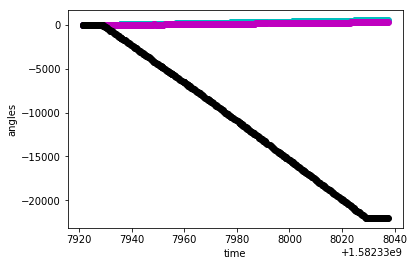

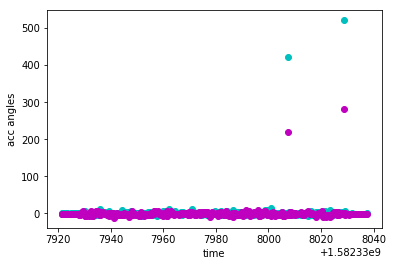

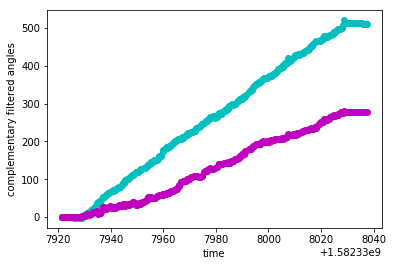

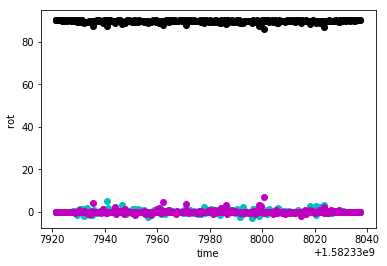

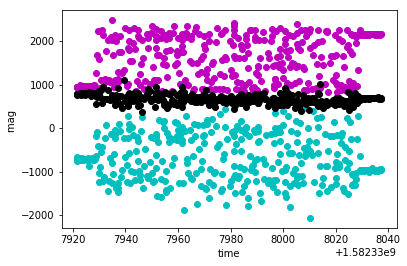

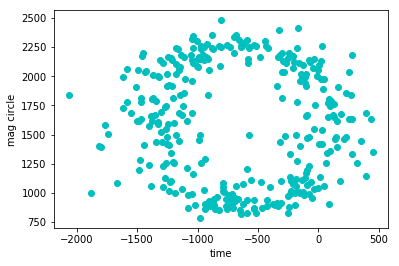

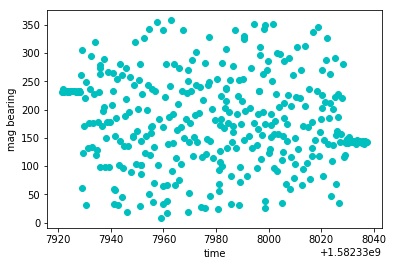

In [10]:
#0 time elapsed
#1-6 ir sensors
plt.plot(column(0,sensor_list),column(1,sensor_list),'bo',
         column(0,sensor_list),column(2,sensor_list),'yo',
         column(0,sensor_list),column(3,sensor_list),'ro',
         column(0,sensor_list),column(4,sensor_list),'go',
         column(0,sensor_list),column(5,sensor_list),'mo',
         column(0,sensor_list),column(6,sensor_list),'ko',)
plt.ylabel('ir sensors')
plt.xlabel('time')
plt.show()

#7 battery
#8 vcc rail
#9 version
#10 user defined
plt.plot(column(0,sensor_list),column(7,sensor_list),'go',
         column(0,sensor_list),column(8,sensor_list),'bo',)
plt.ylabel('batt and vcc')
plt.xlabel('time')
plt.show()


# print("x acc ",temp_data[11])
# print("y acc ",temp_data[12])
# print("z acc ",temp_data[13])


#11 acc x
#12 acc y
#13 acc z
plt.plot(column(0,sensor_list),column(11,sensor_list),'co',
         column(0,sensor_list),column(12,sensor_list),'mo',
         column(0,sensor_list),column(13,sensor_list),'ko',)
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()


#14 angv x
#15 angv y
#16 angv z
plt.plot(column(0,sensor_list),column(14,sensor_list),'co',
         column(0,sensor_list),column(15,sensor_list),'mo',
         column(0,sensor_list),column(16,sensor_list),'ko',)
plt.ylabel('angular velocity')
plt.xlabel('time')
plt.show()

#19 angle x
#20 angle y
#19 angle z 
plt.plot(column(0,sensor_list),column(17,sensor_list),'co',
         column(0,sensor_list),column(18,sensor_list),'mo',
         column(0,sensor_list),column(19,sensor_list),'ko',)
plt.ylabel('angles')
plt.xlabel('time')
plt.show()



#21 acc ang x
#22 acc ang y
plt.plot(column(0,sensor_list),column(20,sensor_list),'co',
         column(0,sensor_list),column(21,sensor_list),'mo',)
plt.ylabel('acc angles')
plt.xlabel('time')
plt.show()

#22 complem ang x
#23 complem ang y
plt.plot(column(0,sensor_list),column(22,sensor_list),'co',
         column(0,sensor_list),column(23,sensor_list),'mo',)
plt.ylabel('complementary filtered angles')
plt.xlabel('time')
plt.show()

#24 rotation x
#25 rotation y
#26 rotation z
plt.plot(column(0,sensor_list),column(24,sensor_list),'co',
         column(0,sensor_list),column(25,sensor_list),'mo',
         column(0,sensor_list),column(26,sensor_list),'ko',)
plt.ylabel('rot ')
plt.xlabel('time')
plt.show()
#27 empty
# print("tilt orientation ",temp_data[27])


#magnetic field 
#28 mag x 
#29 mag y
#30 mag z
plt.plot(column(0,sensor_list),column(28,sensor_list),'co',
         column(0,sensor_list),column(29,sensor_list),'mo',
         column(0,sensor_list),column(30,sensor_list),'ko',)
plt.ylabel('mag ')
plt.xlabel('time')
plt.show()

#x mag and y mag
plt.plot(column(28,sensor_list),column(29,sensor_list),'co')
plt.ylabel('mag circle')
plt.xlabel('time')
plt.show()

# print("mag bearing ",temp_data[32])
plt.plot(column(0,sensor_list),column(32,sensor_list),'co')
plt.ylabel('mag bearing')
plt.xlabel('time')
plt.show()


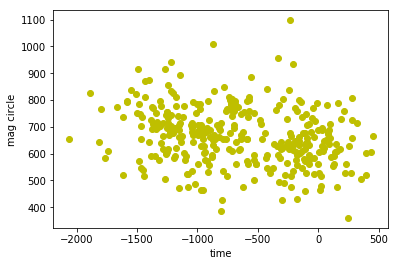

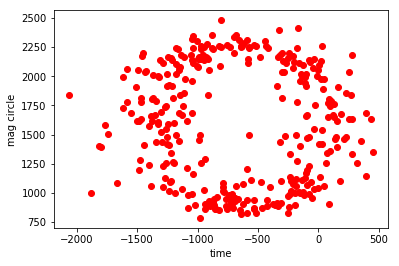

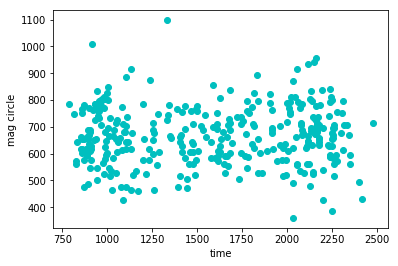

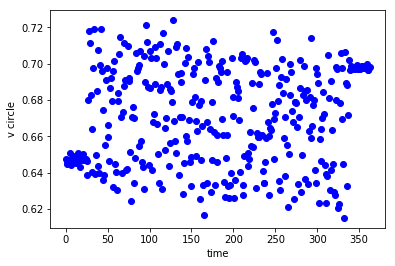

X center  -1840.7634732132137 
z center  -23207.495419978102 
Radius  23912.60845250429
x center  -640.3895135559609 
Y center  1597.617698370909 
Radius  720.7244584305457
y center  1588.0882837400095 
z center  19887.653237556275 
Radius  19223.228076787498


In [11]:
#x mag and y mag
plt.plot(column(28,sensor_list),column(30,sensor_list),'yo')
plt.ylabel('mag circle')
plt.xlabel('time')
plt.show()

#x mag and y mag
plt.plot(column(28,sensor_list),column(29,sensor_list),'ro')
plt.ylabel('mag circle')
plt.xlabel('time')
plt.show()

#x mag and y mag
plt.plot(column(29,sensor_list),column(30,sensor_list),'co')
plt.ylabel('mag circle')
plt.xlabel('time')
plt.show()

import circle_fit as cf
#if you cant import install circle fit
#!sudo pip3 install circle_fit 

#magnetic field 
#28 mag x 
#29 mag y
#30 mag z
mag_x_list = column(28,sensor_list)
mag_y_list = column(29,sensor_list)
mag_z_list = column(30,sensor_list)

v_list = []
for i in range(len(mag_x_list)):
    x = (mag_x_list[i]-(-1038))**2
    y = (mag_y_list[i]-(-1778))**2
    z = (mag_z_list[i]-(-5075))**2
    v = (x+y+z)**0.5/10000
    v_list.append(v)

#x mag and y mag
plt.plot(v_list,'bo')
plt.ylabel('v circle')
plt.xlabel('time')
plt.show()

data = list(zip(mag_x_list, mag_z_list))

xc,yc,r,_ = cf.least_squares_circle((data))
print("X center ",xc, "\nz center ", yc, "\nRadius ", r)

data = list(zip(mag_x_list, mag_y_list))

xc,yc,r,_ = cf.least_squares_circle((data))
print("x center ",xc, "\nY center ", yc, "\nRadius ", r)

data = list(zip(mag_y_list, mag_z_list))

xc,yc,r,_ = cf.least_squares_circle((data))
print("y center ",xc, "\nz center ", yc, "\nRadius ", r)

In [ ]:
import circle_fit as cf
#if you cant import install circle fit
#!sudo pip3 install circle_fit 

#magnetic field 
#28 mag x 
#29 mag y
#30 mag z
mag_x_list = column(28,sensor_list)
mag_y_list = column(29,sensor_list)
mag_z_list = column(30,sensor_list)

data = list(zip(mag_x_list, mag_y_list))

xc,yc,r,_ = cf.least_squares_circle((data))
print("X center ",xc, "\nY center ", yc, "\nRadius ", r)

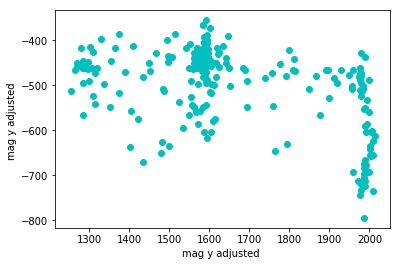

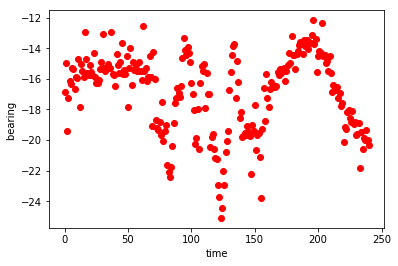

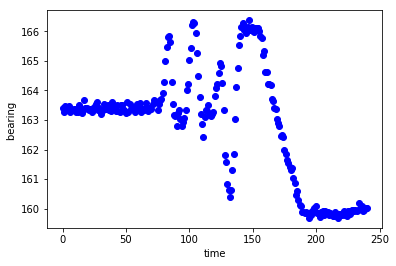

In [6]:
import math

#magnetic field 
#29 mag x
time_list =  column(0,sensor_list)
mag_x_list = column(28,sensor_list)
mag_y_list = column(29,sensor_list)
mag_z_list = column(30,sensor_list)

new_bearing = []
new_phi = []

xc = -1239
yc = 1588
zc = 5075
for i in range(len(mag_x_list)):
    mag_x_list[i] = (mag_x_list[i]- xc)
    mag_y_list[i] = (mag_y_list[i]- yc)
    mag_z_list[i] = (mag_y_list[i]- zc)
    bearing = math.degrees(math.atan2(mag_y_list[i],mag_x_list[i]))
    new_bearing.append(bearing)
    arg = (mag_y_list[i]**2+mag_x_list[i]**2)**0.5
    phi = math.degrees(math.atan2(arg,mag_z_list[i]))
    new_phi.append(phi)

plt.plot(mag_x_list,mag_y_list,'co')
plt.ylabel('mag y adjusted ')
plt.xlabel('mag y adjusted ')
plt.show()

plt.plot(new_bearing,'ro')
plt.ylabel('bearing ')
plt.xlabel('time')
plt.show()

plt.plot(new_phi,'bo')
plt.ylabel('bearing ')
plt.xlabel('time')
plt.show()